![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [314]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [99]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [239]:
# Celda 1.1
print(bikes.groupby('season').total.mean())
#Analizando variable season 
#Se observan cuatro valores unicos y su conteo.
print("Cuatro valores unicos y su conteo")
print(bikes["season"].value_counts())

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64
Cuatro valores unicos y su conteo
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


In [240]:
print("Con describe observamos el numero de registros. Sin embargo al ser una variable categorica de por si, la demas informacion no es de tanta referencia") 
print(bikes["season"].describe())

Con describe observamos el numero de registros. Sin embargo al ser una variable categorica de por si, la demas informacion no es de tanta referencia
count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64


Asimismo, al hacer el conteo e histograma, vemos que los datos son balanceados.


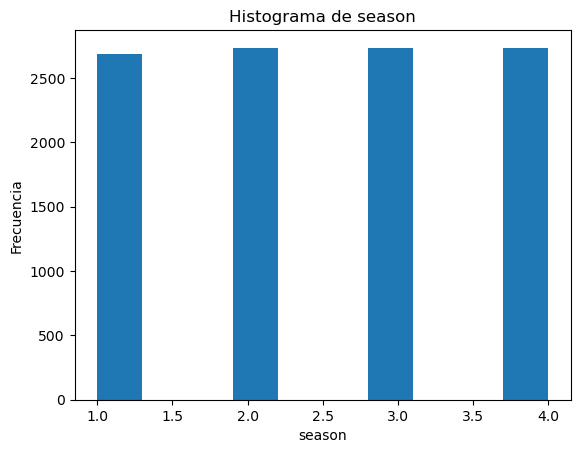

In [184]:
print("Asimismo, al hacer el conteo e histograma, vemos que los datos son balanceados.")
plt.hist(bikes["season"])
plt.title('Histograma de {}'.format(column_name))
plt.xlabel("season")
plt.ylabel('Frecuencia')
plt.show();

El siguiente box plot nos facilita un mejor entendimiento del total de bicicletas rentadas por estacion.


<AxesSubplot: xlabel='season', ylabel='total'>

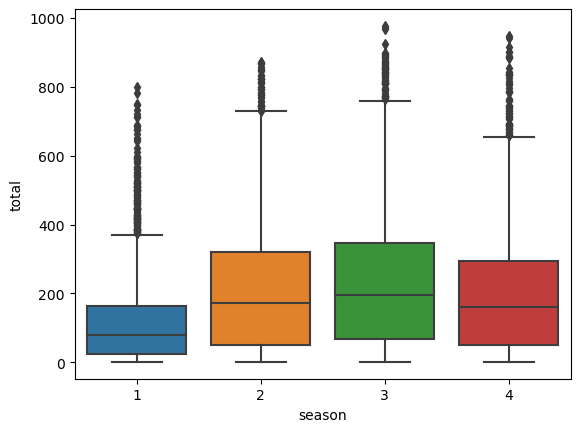

In [244]:
print("El siguiente box plot nos facilita un mejor entendimiento la distribucion de bicicletas rentadas por estacion.")
sns.boxplot(x='season', y='total', data=bikes)

En el box plot, observamos algunos patrones de demanda por estacion.
Por ejemplo, es de esperar que 3(verano) tenga números más altos que otras estaciones asi como se esperaría que las bicicletas rentadas durante 1 (invierno) tengan los números más bajos.

In [74]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [187]:
print("Analizando variable hour, se observan 24 valores unicos. ")
bikes["hour"].value_counts()

Analizando variable hour, se observan 24 valores unicos. 


12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

Al ser esta una variable numerica, describe nos ofrece informacion relevante tales como la media y los percentiles
count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64
Asimismo, al hacer el conteo e histograma, vemos que los datos son balanceados.


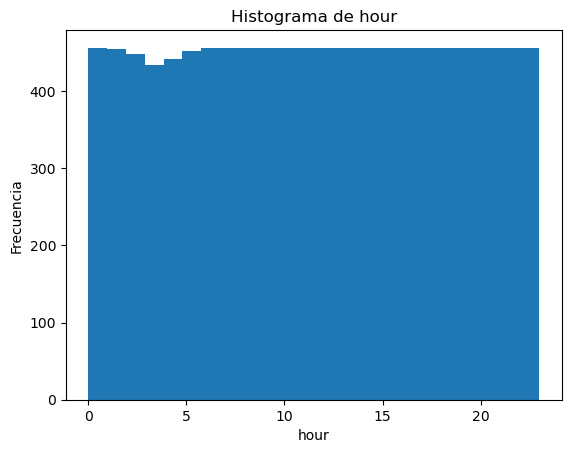

In [370]:
print("Al ser esta una variable numerica, describe nos ofrece informacion relevante tales como la media y los percentiles")
print(bikes["hour"].describe())

print("Asimismo, al hacer el conteo e histograma, vemos que los datos son balanceados.")
plt.hist(bikes["hour"],bins=24)
plt.title('Histograma de hour')
plt.xlabel("hour")
plt.ylabel('Frecuencia')
plt.show();

Este box plot nos permite entender la distribucion del total de bicicletas rentadas por cada hora del dia.


<AxesSubplot: xlabel='hour', ylabel='total'>

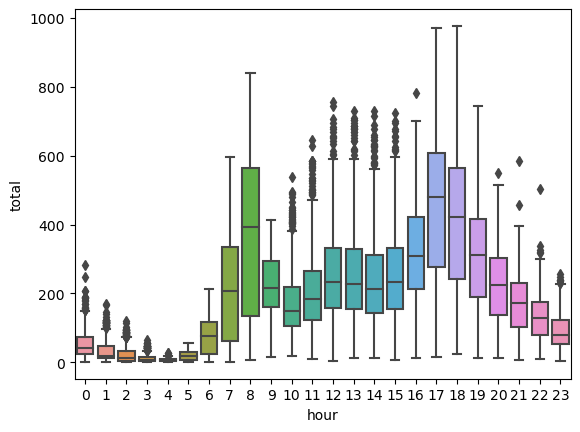

In [247]:
print("Este box plot nos permite entender la distribucion del total de bicicletas rentadas por cada hora del dia.")
sns.boxplot(x='hour', y='total', data=bikes)

Para indagar un poco mas como se relacionan estas dos variables, usaremos un box plot para entender por cuantas horas son rentadas las bicicletas por estacion.


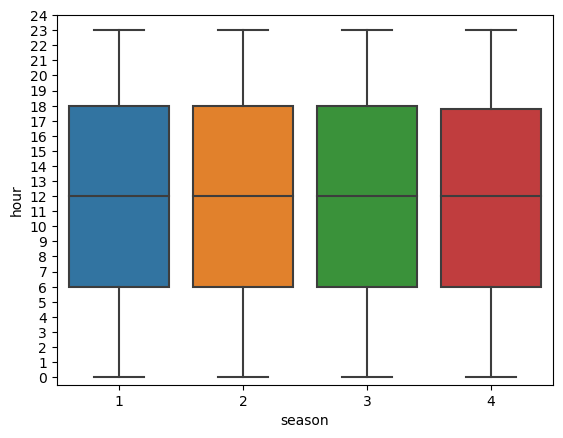

In [252]:
print("Para indagar un poco mas como se relacionan estas dos variables, usaremos un box plot para entender por cuantas horas son rentadas las bicicletas por estacion.")
sns.boxplot(x='season', y='hour', data=bikes)

plt.ylim(-0.5, 3.5) 
plt.yticks(range(0, 25))  

plt.show();

In [372]:
print("Observamos que la demanda en promedio por uso de horas por cada estacion no es tan diferente de las otras.")

Observamos que la demanda en promedio por uso de horas por cada estacion no es tan diferente de las otras.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot: xlabel='hour'>

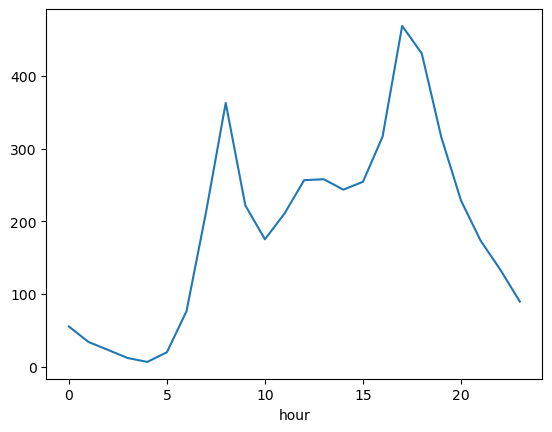

In [194]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

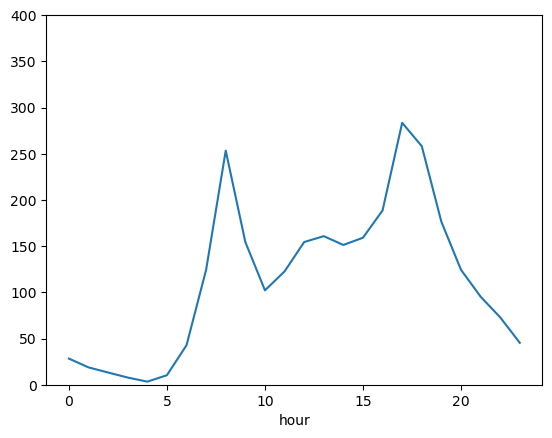

In [199]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()
plt.ylim(0, 400)
plt.show();

<AxesSubplot: xlabel='hour'>

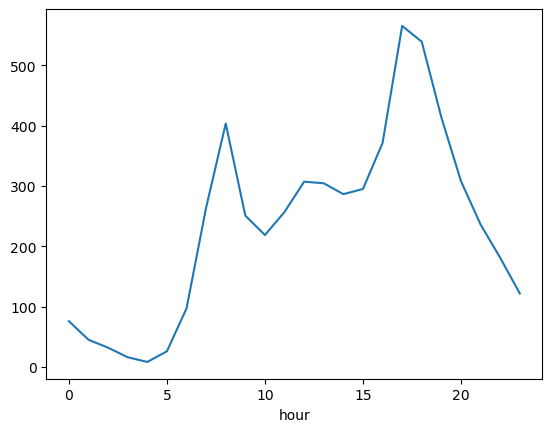

In [203]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()

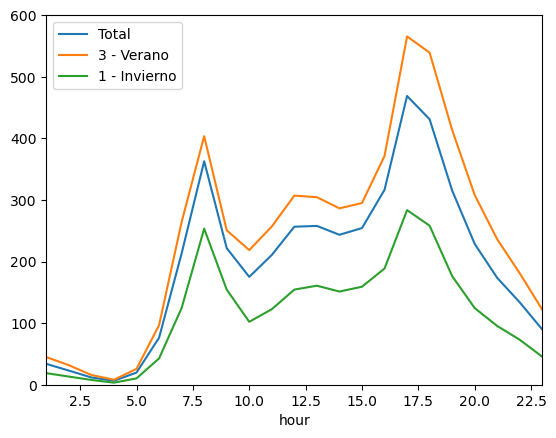

In [215]:
ax =bikes.groupby('hour').total.mean().plot()
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()
plt.ylim(0, 600)
ax.set_xlim(1, 23)
ax.legend(['Total', '3 - Verano', '1 - Invierno'])
plt.show()

## Interpretando resultados
Como es de esperarse hay más frecuencia en el conteo de registros verano que en invierno y la media de todas las estaciones.
Es interesante resaltar que aún asi para los tres escenarios, el comportamiento de los clientes no varia tanto: toman prestadas las bicicletas para un uso de 7.5h y 17h en su mayoria.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [216]:
# Celda 3
#Separando variable respuesta de predictoras
from sklearn.model_selection import train_test_split
y=bikes["total"].reset_index(drop=True)
X=bikes[["season","hour"]].reset_index(drop=True)
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=0)

In [217]:
#importamos sklearn
from sklearn.linear_model import LinearRegression

In [373]:
#elaboramos el modelo y hacemos el fit
modeloLR = LinearRegression().fit(X_Train, y_Train)

score = modeloLR.score(X_Test, y_Test)

y_predLR = modeloLR.predict(X_Test)

# Calculamos MSE
mseLR = mean_squared_error(y_Test, y_predLR)

#ECoeficientes e interceptos
print('Coeficientes:', modeloLR.coef_)
print('Intercepto:', modeloLR.intercept_)
print('MSE:', mseLR)

Coefficientes: [27.57753344 10.55616018]
Intercepto: -0.44218425067265343
MSE: 26572.925310876944


## Interpretación de los coeficientes e intercepto
Los resultados anteriores nos indican que si en un escenario ficticio horas fuesen 2 y la estacion 1.
Total se calcularia como :

## -0.44218425067265343 + (2 x 27.57753344) + (1 x10.55616018)

El resultado seria aprox 65.26 bicicletas rentadas por dos horas en invierno. 

Cabe destacar de que al ser season una variable categorica, no deberiamos tratarla como una variable numerica para predecir un resultado continuo.
Se recomendaria transformar season empleando onehot encoding.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [268]:
# Celda 4
#Arbol manual, max depth es 3 para obtener 6 nodos.

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
#gini_l = gini(y_l)
#gini_r = gini(y_r)

def gini_impurity(X_col, y, split): 
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]  
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)   
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)   
    return gini_impurity_


def best_split(X, y, num_pct=10):   
    features = range(X.shape[1])  
    best_split = [0, 0, 0]  # j, split, gain   
    # Para todas las varibles 
    for j in features:       
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]       
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]   
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10):  
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct) 
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain or level >= max_depth:
        return tree      
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct) 
    return tree

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [221]:
# Celda 5
#importamos sklearn DecisionTreeRegressor y train test split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=0)

Text(0, 0.5, 'mse_scores')

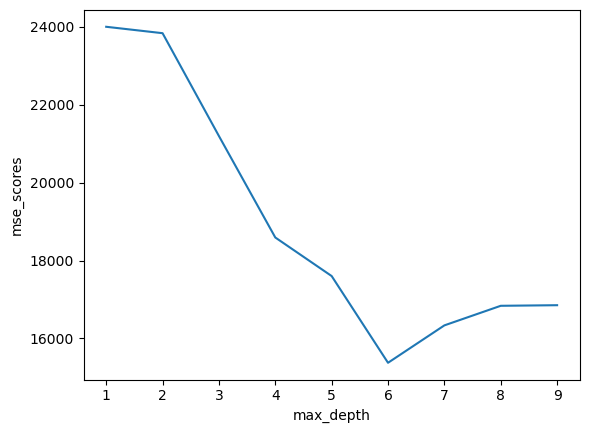

In [222]:
#Calibrando max_depth
from sklearn.model_selection import cross_val_score
max_depth_range = range(1, 10)
mse_scores = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores.append(-cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error').mean())

# Gráfica max_depth versus MSE (error del modelo)
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('mse_scores')

In [225]:
# Mejor MSE y su correspondiente max_depth 6
sorted(zip(mse_scores, max_depth_range))[0]

(15374.840674066669, 6)

In [227]:
# max_depth=6 fue el mejor, se ajusta un árbol usando este valor 
dtree = DecisionTreeRegressor(max_depth=6)
dtree.fit(X_Train, y_Train)
y_pred = dtree.predict(X_Test)
mse = mean_squared_error(y_Test, y_pred)
print("MSE:", mse)

MSE: 13472.498085777746


### Comparando resultados punto 3 y punto 5
Podemos observar que el modelo de árboles de decisión presenta un resultado más satisfactorio en cuanto a la regresión linear.
Como sabemos se puede trabajar con los árboles de decisión tanto con variables numéricas como categóricas, estas últimas no necesitan preprocesamiento. En el caso de modelos de regresión lineal, es necesario un preprocesamiento de datos para variables categóricas. 

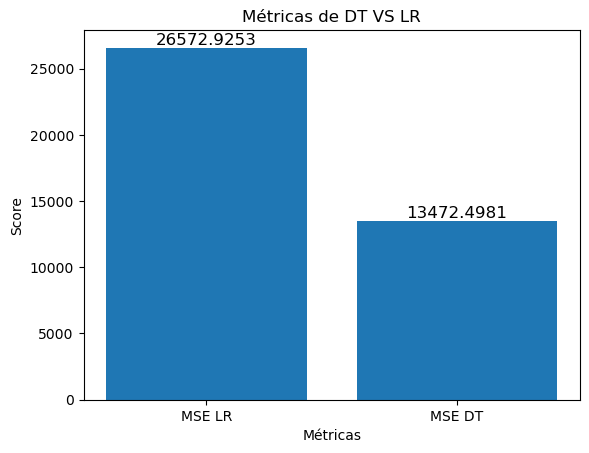

In [365]:
labels = ['MSE LR', 'MSE DT']
values = [mseLR,mse]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métricas de DT VS LR')
ax.set_xlabel('Métricas')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [144]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [157]:
# Definición variable de interes y variables predictoras
XB = df.drop(['url', 'Popular'], axis=1)
yB = df['Popular']
yB.mean()

0.5

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [158]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XB, yB, random_state=1)

In [228]:
# Celda 6
#Modelo Arbol de decision de clasificacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

max_depth_range2 = range(1, 10)
accuracy_scores2 = []
f1_scores = []

#Loop que nos ayuda a calibrar max depth en base a metricas accuracy y f1 score
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)    
    accuracy_scores2.append(cross_val_score(clf, XB, yB, cv=10, scoring='accuracy').mean())
    f1_scores.append(cross_val_score(clf, XB, yB, cv=10, scoring='f1_macro').mean())

Text(0, 0.5, 'Accuracy')

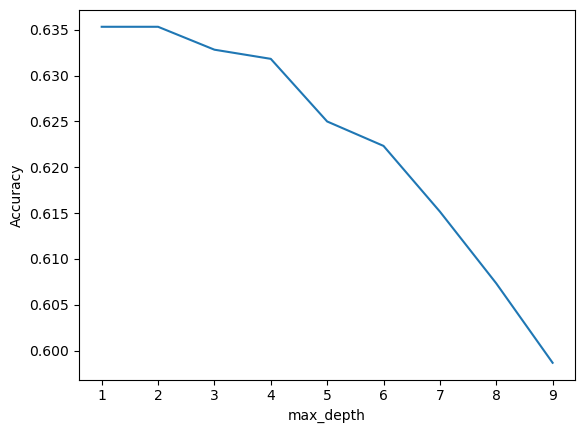

In [229]:
# Gráfica max_depth versus accuracy
plt.plot(max_depth_range2, accuracy_scores2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

#max depth 1 y 2 muestran el mejor desempeno

Text(0, 0.5, 'F1 scores:')

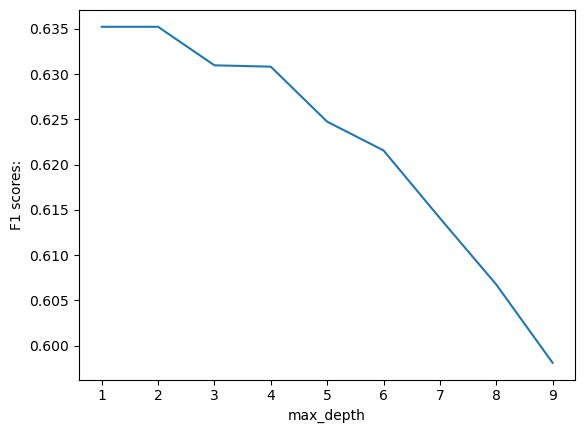

In [230]:
# Gráfica max_depth versus f1
plt.plot(max_depth_range2, f1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1 scores:')
#max depth 1 y 2 muestran el mejor desempeno

In [231]:
#Elaboramos el modelo con max depth=1
clf2 = DecisionTreeClassifier(max_depth=1)
clf2.fit(X_train, y_train)
# Formulamos predicciones
y_pred2 = clf2.predict(X_test)
# Evaluando desempeno con las siguientes metricas
accuracy = accuracy_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("F1 score:", f1)


Accuracy: 0.6453333333333333
F1 score: 0.6448598130841121


In [232]:
#Modelo Regresion Logistica
#Importamos los paquetes necesarios
from sklearn.linear_model import LogisticRegression

In [233]:
# Formulamos el modelo
clfLR = LogisticRegression()
clfLR.fit(X_train, y_train)
# Formulamos predicciones
y_pred3 = clfLR.predict(X_test)
# Evaluando desempeno con las siguientes metricas
accuracyLR = accuracy_score(y_test, y_pred3)
f1LR = f1_score(y_test, y_pred3)
print("Accuracy:", accuracyLR)
print("F1 score:", f1LR)

Accuracy: 0.6133333333333333
F1 score: 0.6096904441453566


### Comparando desempeño de modelos

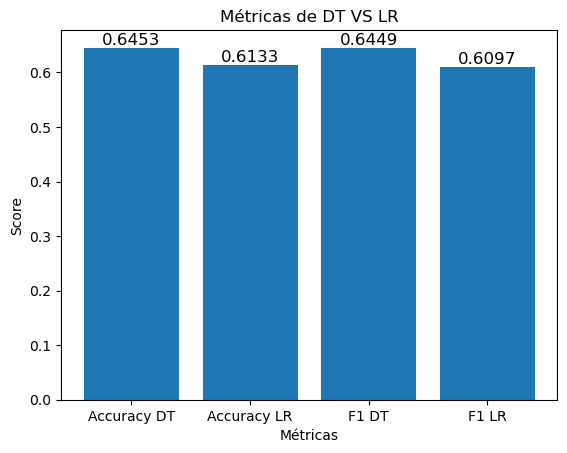

In [364]:
labels = ['Accuracy DT', 'Accuracy LR', 'F1 DT', 'F1 LR']
values = [accuracy,accuracyLR,f1,f1LR]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métricas de DT VS LR')
ax.set_xlabel('Métricas')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

Como podemos observar, el árbol de decisión es el modelo que presenta el mejor rendimiento tanto en métricas de accuracy como de F1 score.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [328]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
#100 árboles de decisión donde max_depth tome un valor de su elección
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier(max_depth=10)
clfBG = BaggingClassifier(base_estimator=dtc, n_estimators=100 ,bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)
clfBG.fit(X_train, y_train)
y_predBG = clfBG.predict(X_test)

accuracyclfBG = accuracy_score(y_test, y_predBG)
f1clfBG = f1_score(y_test, y_predBG)
print("Accuracy:", accuracyclfBG)
print("F1 score:", f1clfBG)

Accuracy: 0.6606666666666666
F1 score: 0.6649111257406188


In [324]:
#100 árboles de decisión donde min_samples_leaf tome un valor de su elección
dtc2 = DecisionTreeClassifier(min_samples_leaf=4)
clfBG2 = BaggingClassifier(base_estimator=dtc2, n_estimators=100 ,bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)
clfBG2.fit(X_train, y_train)
y_predBG2 = clfBG2.predict(X_test)

accuracyclfBG2 = accuracy_score(y_test, y_predBG2)
f1clfBG2 = f1_score(y_test, y_predBG2)
print("Accuracy:", accuracyclfBG2)
print("F1 score:", f1clfBG2)

Accuracy: 0.6573333333333333
F1 score: 0.6649282920469362


In [316]:
#100 regresiones logísticas
lr = LogisticRegression(solver='liblinear')
clfBG3 = BaggingClassifier(base_estimator=lr, n_estimators=100,bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)
clfBG3.fit(X_train, y_train)
y_predBG3 = clfBG3.predict(X_test)

accuracyclfBG3 = accuracy_score(y_test, y_predBG3)
f1clfBG3 = f1_score(y_test, y_predBG3)
print("Accuracy:", accuracyclfBG3)
print("F1 score:", f1clfBG3)

Accuracy: 0.6246666666666667
F1 score: 0.6071179344033495


### Comparando desempeño de modelos

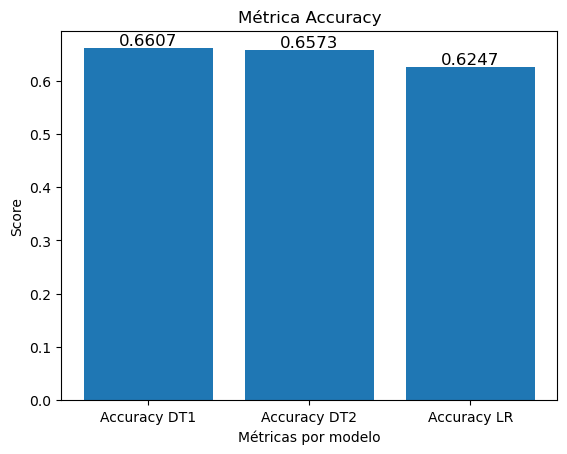

In [363]:
labels = ['Accuracy DT1', 'Accuracy DT2', 'Accuracy LR']
values = [accuracyclfBG,accuracyclfBG2,accuracyclfBG3]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica Accuracy')
ax.set_xlabel('Métricas por modelo')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

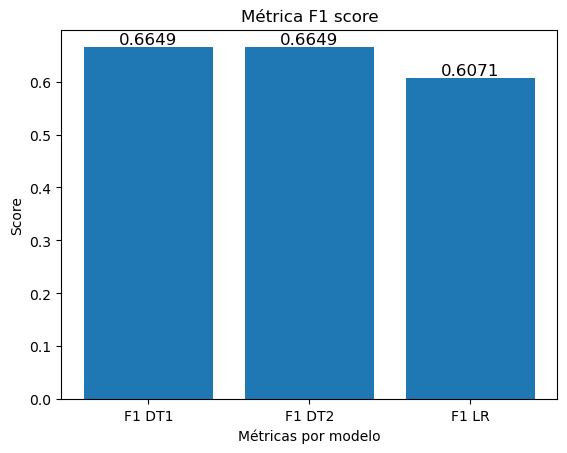

In [362]:
labels = ['F1 DT1', 'F1 DT2', 'F1 LR']
values = [f1clfBG,f1clfBG2,f1clfBG3]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica F1 score')
ax.set_xlabel('Métricas por modelo')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

## En lo que respecta a las métricas de accuracy y f1, el mejor desempeño lo muestra BaggingClassifier cuyo estimador es el árbol de decision de clasificación con parámetro max depth 10. 

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [336]:
# Celda 8
#100 árboles de decisión donde max_depth tome un valor de su elección

dtcp = DecisionTreeClassifier(max_depth=10)
clfBGp = BaggingClassifier(base_estimator=dtcp, n_estimators=300, bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)
clfBGp.fit(X_train, y_train)
y_predBGp = clfBGp.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfBGp.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfBGp.n_estimators))

for i in range(clfBGp.n_estimators):
    oob_sample = ~clfBGp.estimators_samples_[i]
    y_pred_ = clfBGp.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clfBGp.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_predBGp = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

accuracyclfBGp = accuracy_score(y_test, y_predBGp)
f1clfBGp = f1_score(y_test, y_predBGp)
print("Accuracy:", accuracyclfBGp)
print("F1 score:", f1clfBGp)

Accuracy: 0.6593333333333333
F1 score: 0.6613651424784625


In [334]:
#100 árboles de decisión donde min_samples_leaf tome un valor de su elección
dtcp2 = DecisionTreeClassifier(min_samples_leaf=4)
clfBGp2 = BaggingClassifier(base_estimator=dtcp2, n_estimators=100 ,bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)
clfBGp2.fit(X_train, y_train)
y_predBGp2 = clfBGp2.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfBGp2.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfBGp2.n_estimators))

for i in range(clfBGp2.n_estimators):
    oob_sample = ~clfBGp2.estimators_samples_[i]
    y_pred_ = clfBGp2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clfBGp2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_predBGp2 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

accuracyclfBGp2 = accuracy_score(y_test, y_predBGp2)
f1clfBGp2 = f1_score(y_test, y_predBGp2)
print("Accuracy:", accuracyclfBGp2)
print("F1 score:", f1clfBGp2)

Accuracy: 0.6553333333333333
F1 score: 0.6509115462525321


In [335]:
#100 regresiones logísticas
lrp = LogisticRegression(solver='liblinear')
clfBGp3 = BaggingClassifier(base_estimator=lrp, n_estimators=100,bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)
clfBGp3.fit(X_train, y_train)
y_predBGp3 = clfBGp3.predict(X_test)


# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfBGp3.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfBGp3.n_estimators))

for i in range(clfBGp3.n_estimators):
    oob_sample = ~clfBGp3.estimators_samples_[i]
    y_pred_ = clfBGp3.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clfBGp3.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_predBGp3 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

accuracyclfBGp3 = accuracy_score(y_test, y_predBGp3)
f1clfBGp3 = f1_score(y_test, y_predBGp3)
print("Accuracy:", accuracyclfBGp3)
print("F1 score:", f1clfBGp3)

Accuracy: 0.624
F1 score: 0.606145251396648


In [ ]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,random_state=0, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

## Comparando desempeño de modelos 
En lo que respecta a las métricas de accuracy y f1, el mejor desempeño lo sigue mostrando BaggingClassifier cuyo estimador es el árbol de decision de clasificación con parámetro max depth 10. 

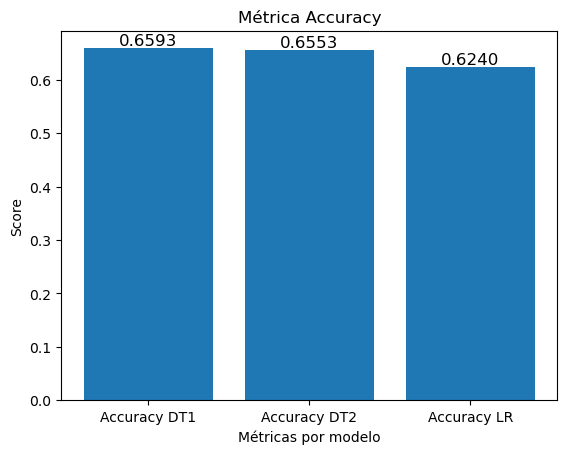

In [361]:
labels = ['Accuracy DT1', 'Accuracy DT2', 'Accuracy LR']
values = [accuracyclfBGp,accuracyclfBGp2,accuracyclfBGp3]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica Accuracy')
ax.set_xlabel('Métricas por modelo')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

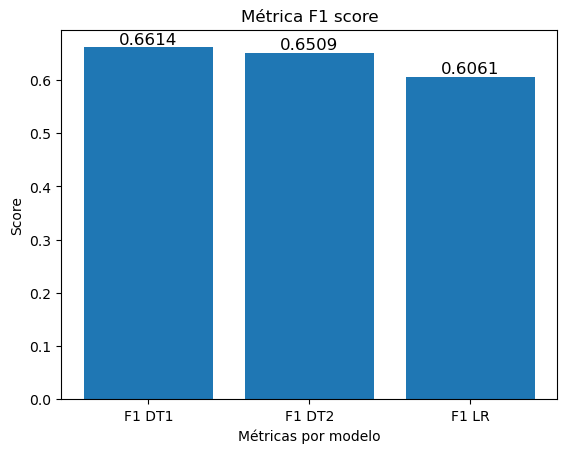

In [360]:
labels = ['F1 DT1', 'F1 DT2', 'F1 LR']
values = [f1clfBGp,f1clfBGp2,f1clfBGp3]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica F1 score')
ax.set_xlabel('Métricas por modelo')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

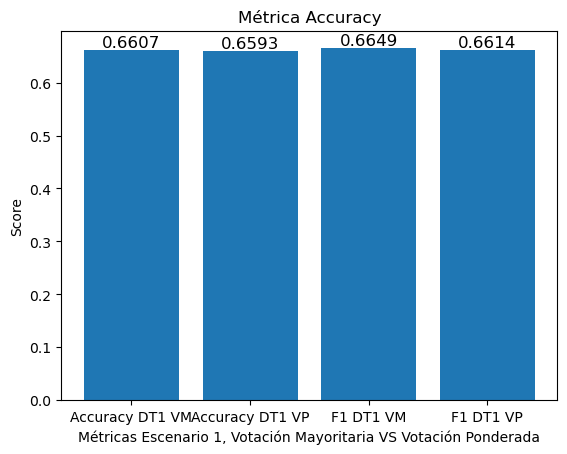

In [357]:
# Celda 9
#Escenario 1
labels = ['Accuracy DT1 VM','Accuracy DT1 VP','F1 DT1 VM','F1 DT1 VP']
values = [accuracyclfBG,accuracyclfBGp,f1clfBG,f1clfBGp]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica Accuracy y F1')

ax.set_title('Métrica Accuracy')
ax.set_xlabel('Métricas Escenario 1, Votación Mayoritaria VS Votación Ponderada')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)
plt.show()

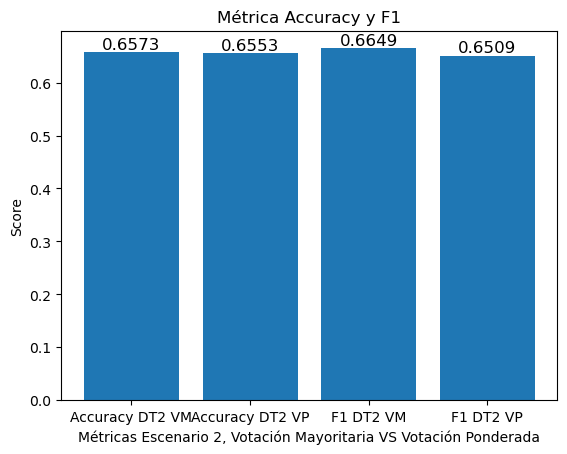

In [358]:
#Escenario 2
labels = ['Accuracy DT2 VM','Accuracy DT2 VP','F1 DT2 VM','F1 DT2 VP']
values = [accuracyclfBG2,accuracyclfBGp2,f1clfBG2,f1clfBGp2]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica Accuracy y F1')
ax.set_xlabel('Métricas Escenario 2, Votación Mayoritaria VS Votación Ponderada')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)


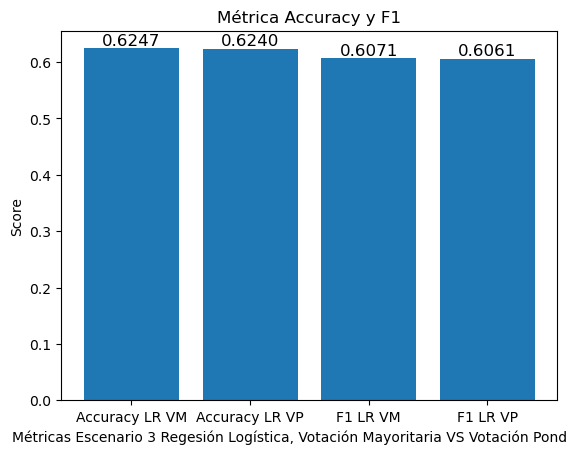

In [359]:
#Escenario 3
labels = ['Accuracy LR VM','Accuracy LR VP','F1 LR VM','F1 LR VP']
values = [accuracyclfBG3,accuracyclfBGp3,f1clfBG3,f1clfBGp3]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Métrica Accuracy y F1')
ax.set_xlabel('Métricas Escenario 3 Regesión Logística, Votación Mayoritaria VS Votación Ponderada')
ax.set_ylabel('Score')

for i, v in enumerate(values):
    ax.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=12)


### Podemos observar que en los tres escenarios, todos los modelos de ensamble con la metodología de votación mayoritaria obtienen resultados más satisfactorios en base a las métricas de accuracy y F1 score. Sin embargo cabe mencionar que para calibrar un árbol de decisión, por general, los parámetros min_samples_leaf y max_depth deberían se calibrados a la misma vez para mejorar el desempeño del modelo. 